In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
data = pd.read_csv("odisha.csv")

In [36]:
data = data.dropna()

In [37]:

data

,date,confirmed,active,recovered,deceased,testing
0,21-03-2020,2.0,2.0,0.0,0.0,61.0
1,22-03-2020,2.0,2.0,0.0,0.0,85.0
2,23-03-2020,2.0,2.0,0.0,0.0,110.0
3,24-03-2020,2.0,2.0,0.0,0.0,133.0
4,25-03-2020,2.0,2.0,0.0,0.0,164.0
5,26-03-2020,3.0,3.0,0.0,0.0,189.0
6,27-03-2020,3.0,3.0,0.0,0.0,226.0
7,28-03-2020,3.0,3.0,0.0,0.0,297.0
8,29-03-2020,3.0,3.0,0.0,0.0,370.0
9,30-03-2020,3.0,3.0,0.0,0.0,473.0


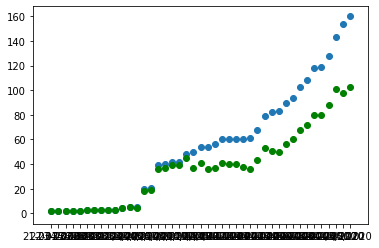

In [40]:

plt.scatter(data['date'],data['confirmed'])
plt.scatter(data['date'],data['active'], color = 'green')

In [53]:
from scipy.optimize import curve_fit 

In [76]:
def test_func(x, a, b):
    return a * np.sin(b * x)
X=np.array(data['date'].index)
params, params_covariance = curve_fit(test_func,X, data['confirmed'])


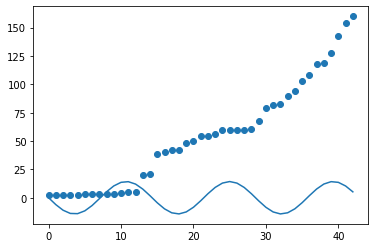

In [125]:

plt.scatter(X,data['confirmed'])
plt.plot(X, test_func(X, params[0], params[1]),
         label='Fitted function')

TypeError: only size-1 arrays can be converted to Python scalars

In [87]:
X.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 43
    # variables        = 3
    chi-square         = 2899.88726
    reduced chi-square = 72.4971814
    Akaike info crit   = 187.082762
    Bayesian info crit = 192.366362
[[Variables]]
    amp:  28490.0167 +/- 53230.1384 (186.84%) (init = 5)
    cen:  93.5235059 +/- 50.0601840 (53.53%) (init = 5)
    wid:  32.7544097 +/- 12.7206225 (38.84%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, cen) =  0.999
    C(cen, wid) =  0.997
    C(amp, wid) =  0.993


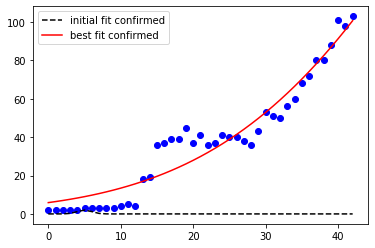

In [138]:
# <examples/doc_model_gaussian.py>
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model


x = data['date'].index
y = data['active']
z = data['recovered']

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit confirmed')
plt.plot(x, result.best_fit, 'r-', label='best fit confirmed')
plt.legend(loc='best')
plt.show()


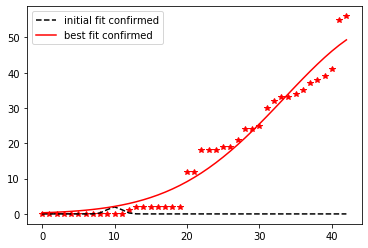

In [139]:

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))
act_result =gmodel.fit(z, x=x, amp=5, cen=10, wid=1)
#print(act_result.fit_report())
plt.plot(x, z, 'r*')
plt.plot(x, act_result.init_fit, 'k--', label='initial fit confirmed')
plt.plot(x, act_result.best_fit, 'r-', label='best fit confirmed')
plt.legend(loc='best')
plt.show()

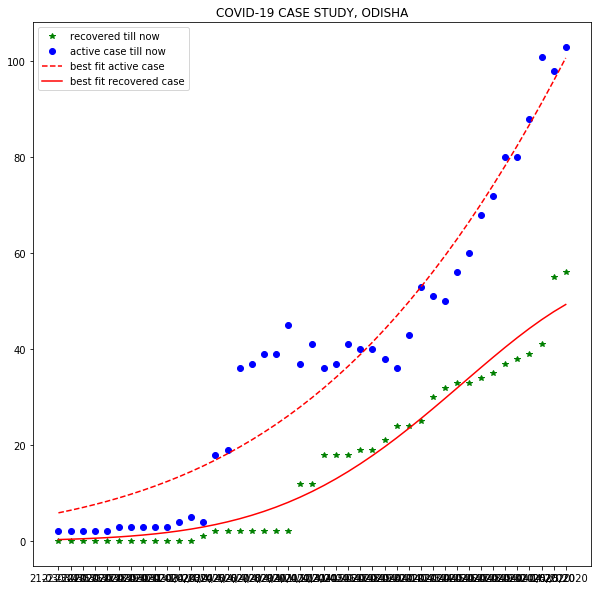

In [140]:
plt.figure(figsize=(10,10))
plt.plot(data['date'], z, '*', color='green', label="recovered till now")
plt.plot(data['date'], y, 'bo', color='blue', label = 'active case till now')
plt.plot(data['date'], result.best_fit, 'r--', label='best fit active case')
plt.plot(data['date'], act_result.best_fit, 'r-', label='best fit recovered case')
plt.title("COVID-19 CASE STUDY, ODISHA")
plt.legend(loc='best')
plt.show()